# Notebook_2 - Logistic Growth



### Import needed packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# let's set things up so we have nice font sizes
plt.rcParams.update({'font.size': 12})

Some basic commands in "blue mode":
- a - above
- b - below
- x - cut
- v - paste
- m - markdown
- y - code

- shift+enter - execute current cell, go to next cell
- ctrl+enter - execute current cell, stay on current cell

### Goals

We want to explore numerical solutions to the Logistic Growth Equation
$$\frac{dn}{dt} = r_c n(t) \left( 1- \frac{n(t)}{K} \right )$$
with the initial condition
$$n(0)=n_0 $$

Note: we're going to use Euler's method:
$$y_{n+1} = y_{n} + h f(x_n,y_n)$$
$$x_{n+1} = x_{n} + h$$

# Question 1
1. Can you complete the following code, by updating line 5 for the Logistic Growth Equation?

In [2]:
# This function takes in where we are "now" (t,nt) as well as a
# step size h, and then takes a step in the right direction. 
# Can you update Line 5 for the Logistic Growth Equation? 
def forward_euler_step(t,nt,h):
    n_next = nt + h * f(t,nt)
    t_next = t + h
    return t_next,n_next

def f(t,n):
    return rc*n*(1-n/K)

I wrote this code as a wrapper around the `forward_euler_step` function. If you pass it an intial t value `t0`, an initial n values `n0`, and a final t value `tf`, it will return an array of `t` and `n` values that solve the differential equation. 

In [3]:
def ode_solve(t0,n0,tf):
    # Let's initialize some empty Python lists to store the solution
    t_solution = []
    n_solution = []
    # And let's put in the initial conditions: x=1 and y=1
    # by appending them to the end of the lists.
    t_solution.append(t0)
    n_solution.append(n0)
    # We'll keep stepping forward until we've reached x_final
    while ( t_solution[-1]<tf ):
        # take a step
        t_next,n_next=forward_euler_step(t_solution[-1],n_solution[-1],h)
        # take the new positions we just computed and put them 
        # at the end of the solution
        t_solution.append(t_next)
        n_solution.append(n_next)
    return np.array(t_solution), np.array(n_solution)

# Question 2
2. Can you fill in the code below so that you choose parameters that you find interesting, and then plot your results?  (Don't forget to label your plot)

(0.0, 52.49432468152751)

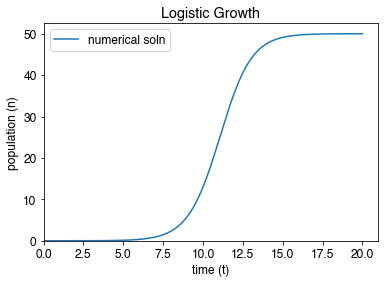

In [7]:
# Step size
h=0.05
# Carrying Capacity K
K = 50
# Growth rate
rc = 1
# Initial Condition 
n0 = 0.001

# Time to "integrate" forward
t_final = 20

t,n = ode_solve(0,n0,t_final)

# Set up the axes
fig, ax = plt.subplots(nrows=1,ncols=1)
# Plot the numerical solution
ax.plot(t,n,label='numerical soln')

# Make the plot attractive
ax.set_xlabel('time (t)')
ax.set_ylabel('population (n)')
ax.legend(loc='best')
ax.set_title('Logistic Growth')
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

# Question 3
3. Can you take your plotting code and encapsulate it in a new function called `plot` ? Plot should have inputs `t` and `n`, and should return nothing. It should simply create a plot from the values of `t` and `n` given, including labels. 


Once you've done this, use your new code to explore various parameter settings.  What effects do `h`, `K`, `rc`, `n0` have? 

BONUS: can you find a way to plot the carrying capacity `K` on your plot in a red dashed line, by modifying your `plot` function?

DOUBLE BONUS: how can you plot the carrying capacity *underneath* your numerical solution? 

In [8]:
def plot(t,n):
    # Set up the axes
    fig, ax = plt.subplots(nrows=1,ncols=1)
    # Plot the numerical solution
    ax.plot(t,n,label='numerical soln',zorder=2)
    ax.plot([0,t_final],[K,K],'r--',label='K',zorder=1)

    # Make the plot attractive
    ax.set_xlabel('time (t)')
    ax.set_ylabel('population (n)')
    ax.legend(loc='best')
    ax.set_title('Logistic Growth')
    ax.set_xlim(left=0)
    ax.set_ylim(bottom=0)

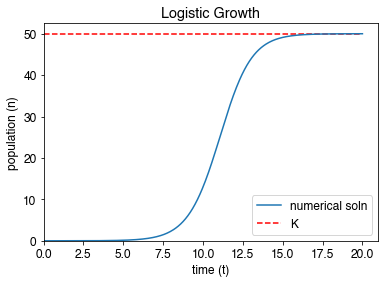

In [9]:
# Step size
h=0.05
# Carrying Capacity K
K = 50
# Growth rate
rc = 1
# Initial Condition 
n0 = 0.001
# Time to "integrate" forward
t_final = 20

t,n = ode_solve(0,n0,t_final)
plot(t,n)

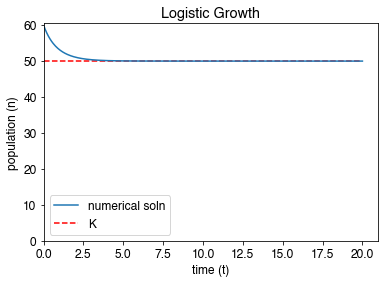

In [10]:
# Step size
h=0.05
# Carrying Capacity K
K = 50
# Growth rate
rc = 1
# Initial Condition 
n0 = 60
# Time to "integrate" forward
t_final = 20

t,n = ode_solve(0,n0,t_final)
plot(t,n)

# Question 4: 
4. Reflect: what are some typical constraints on the values that `K` and `rc` can take? How does `K` relate to `n0`?

- $K\geq0$
- rc>0

These rules are reasonable for biological growth, but as we showed in class, it is possible to still solve the equations without these assumptions!

# BONUS: Vector Fields

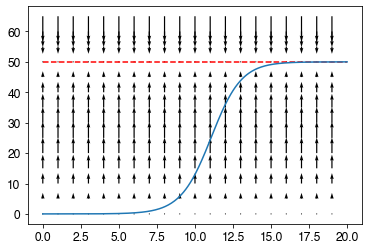

In [12]:
# PARAMETERS AND INITIAL CONDITIONS
h=0.05 # Step size
K = 50 # Carrying Capacity K
rc = 1 # Growth rate
n0 = 0.001 # Initial Condition 
t_final = 20 # Time to "integrate" forward

# VECTOR FIELD SETUP
tvals = np.arange(0,20,1)
nvals = np.arange(0,70,5)
X,Y = np.meshgrid(tvals,nvals)
u = 0
v = f(X,Y)

# Solve the ODE
t,n = ode_solve(0,n0,t_final)

# Plot
fig, ax = plt.subplots(nrows=1,ncols=1)
ax.quiver(X,Y,u,v)
ax.plot(t,n,label='numerical soln',zorder=2)
ax.plot([0,t_final],[K,K],'r--',label='K',zorder=1)